<a href="https://colab.research.google.com/github/Fatimah007/Exercises-/blob/main/Copy_of_ARIMA_Exercise_e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Parameter Analysis for the ARIMA model**

## Import the library


In [1]:
# Import packages
import plotly.express as px
import pandas as pd

## Read dataset

In [2]:
# Read in the data
data = pd.read_csv('/content/traffic.csv')
#data['Month'] = pd.to_datetime(data['Month'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


## Fit auto_arima function to AirPassengers dataset




In [9]:
def plot_traffic_volumes(df: pd.DataFrame, y: str) -> None:
    """General function to plot the traffic data."""

    fig = px.line(df, x='DateTime', y=y, labels={'DateTime': 'Date'})
    fig.update_layout(template="simple_white", font=dict(size=18), title_text='traffic', width=650, title_x=0.5, height=400)

    return fig.show()

# Plot the traffic data
plot_traffic_volumes(df=data, y='Vehicles')

## To print the summary


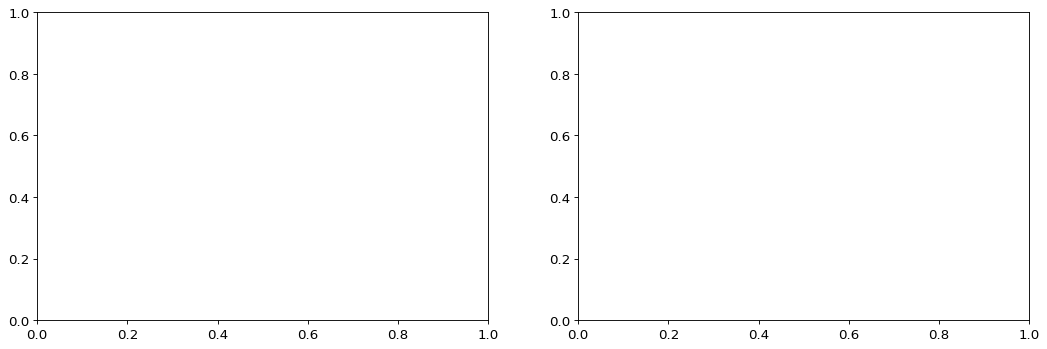

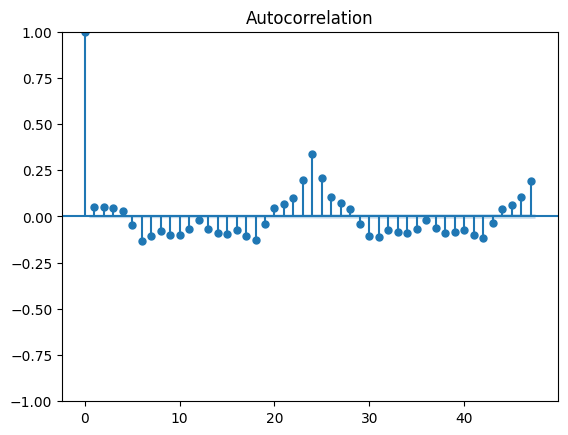

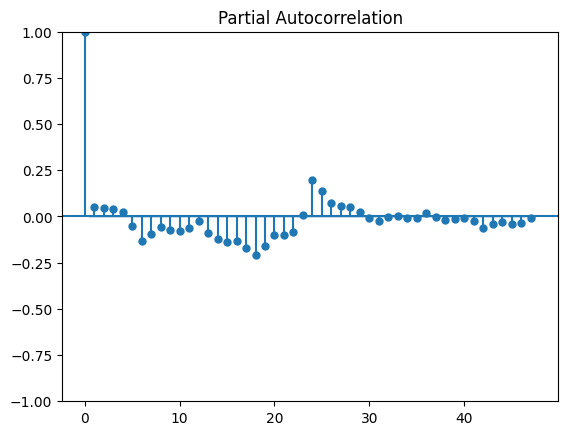

In [10]:
# modelling

# Import packages
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Difference the data
data["Vehicles_diff"] = data["Vehicles"].diff()
data.dropna(inplace=True)

# Plot acf and pacf
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5), dpi=80)
plot_acf(data['Vehicles_diff'])
plot_pacf(data['Vehicles_diff'], method='ywm')
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

# Fit ARIMA Model

## Split data into train / test sets


In [13]:
# Import packages
from statsmodels.tsa.arima.model import ARIMA
from scipy.special import inv_boxcox
from scipy.stats import boxcox

# Split train and test
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]

# Build ARIMA model and inverse the boxcox
model = ARIMA(train['Vehicles'], order=(24, 1, 25)).fit()
boxcox_forecasts = model.forecast(len(test))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood opt

## Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set


In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Vehicles'], order=(0, 1, 1), seasonal_order=(2, 1, 1,12))

result =model.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Vehicles   No. Observations:                38496
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood             -110631.112
Date:                            Wed, 21 Aug 2024   AIC                         221272.223
Time:                                    08:36:51   BIC                         221315.013
Sample:                                         0   HQIC                        221285.792
                                          - 38496                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1883      0.002   -107.902      0.000      -0.192      -0.185
ar.S.L12      -0.2282      0.003    -71.525      0.000      -0.234      -0.222
ar.S.L24       0.2781      0.002    112.334      0.000       0.273       0.283
ma.S.L12      -0.9782      0.001   -951.005      0.000      -0.980      -0.976
sigma2        18.3696      0.029    634.001      0.000      18.313      18.426
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):           2729266.14
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                             1.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        44.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions of ARIMA Model against the test set

In [18]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



## plot predictions and actual values



<Axes: >

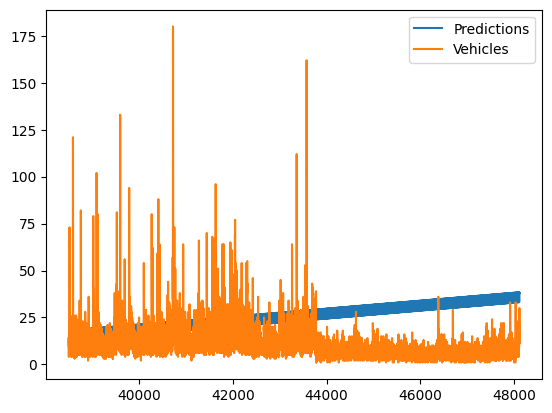

In [20]:
predictions.plot(legend = True)
test['Vehicles'].plot(legend = True)

## Evaluate the model using MSE and RMSE

In [22]:
# Import packages
import plotly.graph_objects as go

def plot_forecasts(forecasts: list[float], title: str) -> None:
    """Function to plot the traffic."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['DateTime'], y=train['Vehicles'], name='Train'))
    fig.add_trace(go.Scatter(x=test['DateTime'], y=test['Vehicles'], name='Test'))
    fig.add_trace(go.Scatter(x=test['DateTime'], y=forecasts, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='traffic Volume')

    return fig.show()

# Plot the forecasts
plot_forecasts(forecasts=boxcox_forecasts, title='ARIMA')

#**Well Done :)**